<a href="https://colab.research.google.com/github/Bitang-Melyen-Tanulok/Csip_Csip/blob/main/sample_train_spectrograms_20_first_newSg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/DeepLearning'

Mounted at /content/drive


In [3]:
# Turns audio to spectrograms and saves them to the given folder
def save_spectrogram_to_disk(path_to_audio, path_to_spectrogram_ogg, sample_duration_sec=5.0, hop_length_sec=2.5):
  audio_data, audio_rate = librosa.load(path_to_audio)

  sample_duration_frames = int(sample_duration_sec * audio_rate)

  n_fft = 2048 # [2024 2nd place]
  hop_length = 512 # [2024 2nd place]
  n_mels = 128 # [2024 2nd place]
  # win_length is automatically equal to n_fft

  # Pad audio with zeros if smaller than sample_duration_sec - original data is in the center
  if len(audio_data) < sample_duration_frames:
    padding_length = sample_duration_frames - len(audio_data)
    pad_start = padding_length // 2
    pad_end = padding_length - pad_start
    audio_data = np.pad(audio_data, (pad_start, pad_end), mode='constant', constant_values=0)

  # Cut first 5 seconds from audio_data
  sample = audio_data[:sample_duration_frames]

  # Generate mel spectrogram
  S = librosa.feature.melspectrogram(
      y=sample,
      sr=audio_rate,
      n_fft=n_fft,
      hop_length=hop_length,
      n_mels=n_mels,
      fmin=40, # [2024 1st place]
      fmax=16000, # Bird calls are usually high pitched, we don't want to remove those frequencies
  )

  # Convert to decibel scale
  S_db = librosa.power_to_db(S, ref=np.max)

  spectrogram_file_path = path_to_spectrogram_ogg.split('.')[0]+'.png'

  # Save spectrogram in grayscale. This way, it's more likely to be compatible with other CNN models
  img = librosa.display.specshow(S_db, sr=audio_rate, hop_length=hop_length, cmap='gray')

  plt.axis('off')
  plt.savefig(spectrogram_file_path, bbox_inches='tight', pad_inches=0)

current folder: blrwar1
current folder: categr
current folder: forwag1
current folder: grenig1
current folder: jerbus2
current folder: insowl1
current folder: junmyn1
current folder: lewduc1
current folder: plaflo1
current folder: pursun4
current folder: putbab1
current folder: redspu1
current folder: revbul
current folder: rewlap1
current folder: rufbab3


/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


current folder: rutfly6
current folder: sqtbul1
current folder: vefnut1
current folder: barswa
current folder: rerswa1


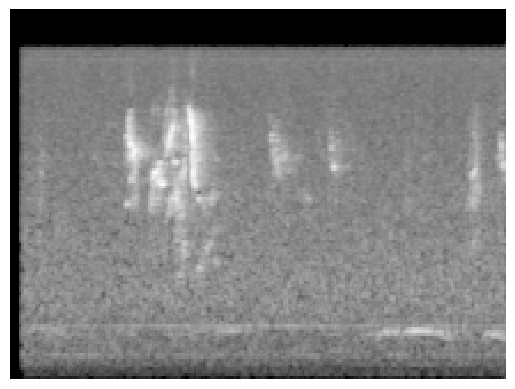

In [4]:
folders = os.listdir(path+'/sample_train_audio')

for j, folder in enumerate(folders):
  # if (j >= 5): break # for now, we only create spectrograms for audio in the first 5 folders

  print("current folder:", folder)
  folder_path = path+'/sample_train_audio/'+folder+'/'

  spectrogram_folder_path = path+'/sample_train_spectrograms_20_first_newSg/'+folder+'/'
  if not os.path.exists(spectrogram_folder_path):
    os.makedirs(spectrogram_folder_path)

    files = os.listdir(folder_path)

    for i, file in enumerate(files):
      # if (i >= 20): break # for now, we only look at the first 20 elements of a folder (maximum)
      save_spectrogram_to_disk(folder_path+file, spectrogram_folder_path+file)